# KNN on large datasets

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('CVD_cleaned.csv')
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [5]:
df.duplicated().sum()

80

In [7]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [11]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
columns_to_encoded=['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Smoking_History']
for columns in columns_to_encoded:
    df[columns]=label_encoder.fit_transform(df[columns])
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,2,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,2,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,2,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,1,0,0,0,0,0,0,1,25-29,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,1,0,0,0,0,2,0,1,65-69,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,1,0,0,0,1,3,0,0,30-34,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,1,0,0,0,0,0,0,1,65-69,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [12]:
#One Hot encoding
df=pd.get_dummies(df,columns=['Checkup'],prefix=['Checkup'])
df

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,Poor,0,0,0,0,0,0,1,0,70-74,...,1,0.0,30.0,16.0,12.0,0,0,1,0,0
1,Very Good,0,1,0,0,0,2,0,0,70-74,...,0,0.0,30.0,0.0,4.0,0,0,0,0,1
2,Very Good,1,0,0,0,0,2,0,0,60-64,...,0,4.0,12.0,3.0,16.0,0,0,0,0,1
3,Poor,1,1,0,0,0,2,0,1,75-79,...,0,0.0,30.0,30.0,8.0,0,0,0,0,1
4,Good,0,0,0,0,0,0,0,1,80+,...,1,0.0,8.0,4.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,1,0,0,0,0,0,0,1,25-29,...,0,4.0,30.0,8.0,0.0,0,0,0,0,1
308850,Fair,1,0,0,0,0,2,0,1,65-69,...,0,8.0,15.0,60.0,4.0,0,0,0,1,0
308851,Very Good,1,0,0,0,1,3,0,0,30-34,...,1,4.0,40.0,8.0,4.0,1,0,0,0,0
308852,Very Good,1,0,0,0,0,0,0,1,65-69,...,0,3.0,30.0,12.0,0.0,0,0,0,0,1


In [13]:
#Target variable encoding
df['General_Health']=label_encoder.fit_transform(df['General_Health'])
df

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,3,0,0,0,0,0,0,1,0,70-74,...,1,0.0,30.0,16.0,12.0,0,0,1,0,0
1,4,0,1,0,0,0,2,0,0,70-74,...,0,0.0,30.0,0.0,4.0,0,0,0,0,1
2,4,1,0,0,0,0,2,0,0,60-64,...,0,4.0,12.0,3.0,16.0,0,0,0,0,1
3,3,1,1,0,0,0,2,0,1,75-79,...,0,0.0,30.0,30.0,8.0,0,0,0,0,1
4,2,0,0,0,0,0,0,0,1,80+,...,1,0.0,8.0,4.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,0,0,1,25-29,...,0,4.0,30.0,8.0,0.0,0,0,0,0,1
308850,1,1,0,0,0,0,2,0,1,65-69,...,0,8.0,15.0,60.0,4.0,0,0,0,1,0
308851,4,1,0,0,0,1,3,0,0,30-34,...,1,4.0,40.0,8.0,4.0,1,0,0,0,0
308852,4,1,0,0,0,0,0,0,1,65-69,...,0,3.0,30.0,12.0,0.0,0,0,0,0,1


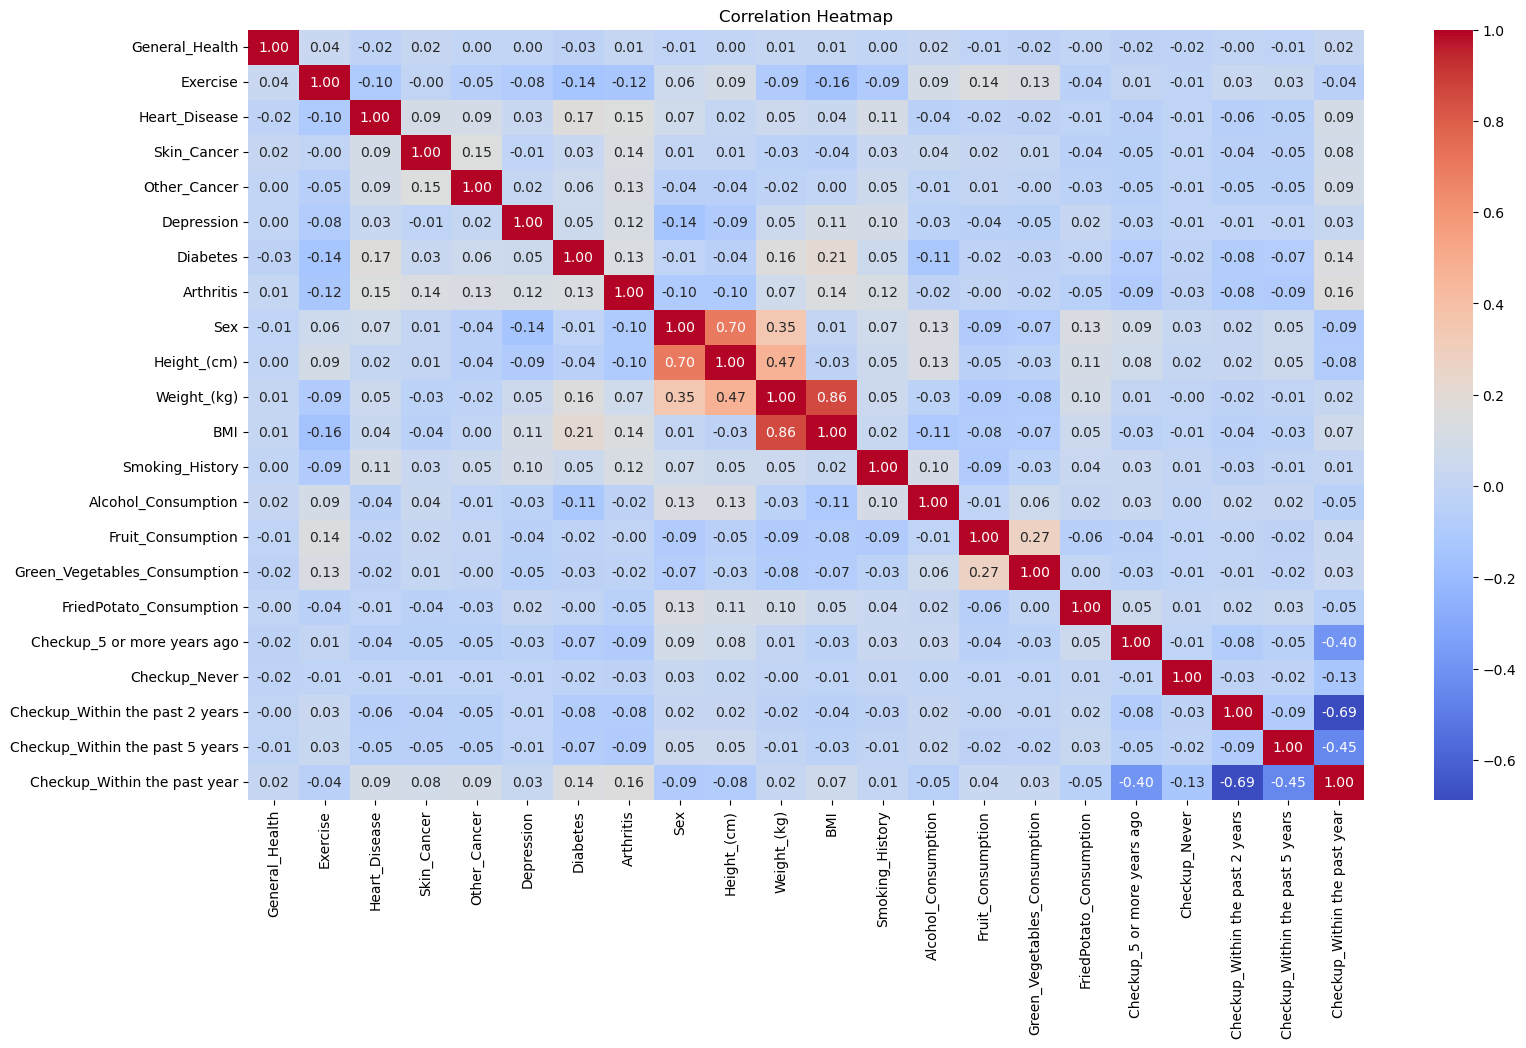

In [18]:
#Correlation matrix
corr_matrix=df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
columns_to_drop=['Other_Cancer','Depression','Age_Category','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']
df=df.drop(columns=columns_to_drop)
df

,General_Health,Exercise,Heart_Disease,Skin_Cancer,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,3,0,0,0,0,1,0,150.0,32.66,14.54,1,0.0,0,0,1,0,0
1,4,0,1,0,2,0,0,165.0,77.11,28.29,0,0.0,0,0,0,0,1
2,4,1,0,0,2,0,0,163.0,88.45,33.47,0,4.0,0,0,0,0,1
3,3,1,1,0,2,0,1,180.0,93.44,28.73,0,0.0,0,0,0,0,1
4,2,0,0,0,0,0,1,191.0,88.45,24.37,1,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,1,168.0,81.65,29.05,0,4.0,0,0,0,0,1
308850,1,1,0,0,2,0,1,180.0,69.85,21.48,0,8.0,0,0,0,1,0
308851,4,1,0,0,3,0,0,157.0,61.23,24.69,1,4.0,1,0,0,0,0
308852,4,1,0,0,0,0,1,183.0,79.38,23.73,0,3.0,0,0,0,0,1


In [42]:
#Normalizing Height,weight and BMI columns
columns_to_normalize=['Weight_(kg)','BMI']
for column in columns_to_normalize:
    df[column]=df[column]/10
df

,General_Health,Exercise,Heart_Disease,Diabetes,Arthritis,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,3,0,0,0,1,0.3266,0.1454,1,1.0,0,0,1,0,0
1,4,0,1,2,0,0.7711,0.2829,0,1.0,0,0,0,0,1
2,4,1,0,2,0,0.8845,0.3347,0,5.0,0,0,0,0,1
3,3,1,1,2,0,0.9344,0.2873,0,1.0,0,0,0,0,1
4,2,0,0,0,0,0.8845,0.2437,1,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0.8165,0.2905,0,5.0,0,0,0,0,1
308850,1,1,0,2,0,0.6985,0.2148,0,9.0,0,0,0,1,0
308851,4,1,0,3,0,0.6123,0.2469,1,5.0,1,0,0,0,0
308852,4,1,0,0,0,0.7938,0.2373,0,4.0,0,0,0,0,1


In [50]:
df['Alcohol_Consumption']=df['Alcohol_Consumption']+1
df

,General_Health,Exercise,Heart_Disease,Diabetes,Arthritis,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Checkup_5 or more years ago,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,3,0,0,0,1,0.3266,0.1454,1,1.0,0,0,1,0,0
1,4,0,1,2,0,0.7711,0.2829,0,1.0,0,0,0,0,1
2,4,1,0,2,0,0.8845,0.3347,0,5.0,0,0,0,0,1
3,3,1,1,2,0,0.9344,0.2873,0,1.0,0,0,0,0,1
4,2,0,0,0,0,0.8845,0.2437,1,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0.8165,0.2905,0,5.0,0,0,0,0,1
308850,1,1,0,2,0,0.6985,0.2148,0,9.0,0,0,0,1,0
308851,4,1,0,3,0,0.6123,0.2469,1,5.0,1,0,0,0,0
308852,4,1,0,0,0,0.7938,0.2373,0,4.0,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [51]:
X=df.drop(columns=['General_Health'])
y=df['General_Health']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.32069892182997506


In [56]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.34286670192214297


In [57]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.35440387666339296


In [62]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.40833396289540996


The KNN algorithm does not work well with large datasets.The cost of calculating the distance between the new point and each existing point is huge, which degrades performance.Hyperparameter tuning can be used. Will update later